<a href="https://colab.research.google.com/github/sofiacanelag/MLUCM2223/blob/main/TRABAJO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib inline     
sns.set(color_codes=True)

##1. ANÁLISIS DESCRIPTIVO DE LOS DATOS
DESCRIPCIÓN DE LAS VARIABLES
1. **id**: Identificador único para cada casa vendida
2. **date**: Fecha en la que se vendió la casa.
3. **price**: Precio de venta de la casa.
4. **bedrooms**: Número de habitaciones en la casa.
5. **bathrooms**: Número de baños en la casa. Donde 0.5 representa una habitación con un inodoro pero sin ducha
6. **sqft_living**: Área de la sala de estar de la casa en pies cuadrados.
7. **sqft_lot**: Área del terreno en pies cuadrados.
8. **floors**: Número de pisos en la casa.
9. **waterfront**: Variable binaria que indica si la casa tiene vista al agua.
10. **view**: Índice de la vista de la casa (0-4).
11. **condition**: Índice de la condición de la casa (1-5).
12. **grade**: Índice de la calidad de la construcción y diseño de la casa (1-13). Donde del 1 al 3 no cumplen con la construcción y diseño de la edificación, 7 tiene un nivel promedio de construcción y diseño, y del 11 al 13 tienen un nivel alto de calidad en la construcción y diseño.
13. **sqft_above**: Área de la casa por encima del nivel del suelo en pies cuadrados.
14. **sqft_basement**: Área del sótano de la casa en pies cuadrados.
15. **yr_built**: Año en que se construyó la casa.
16. **yr_renovated**: Año en que se renovó la casa (0 si nunca se renovó).
17. **zipcode**: Código postal de la ubicación de la casa.
18. **lat**: Latitud de la ubicación de la casa.
19. **long**: Longitud de la ubicación de la casa.
20. **sqft_living15**: Área de la sala de estar de los 15 vecinos más cercanos en pies cuadrados.
21. **sqft_lot15**: Área del terreno de los 15 vecinos más cercanos en pies cuadrados.

Estos datos describen varias características de las casas vendidas en King County, Washington, EE. UU. durante el período de mayo de 2014 a mayo de 2015

In [2]:
#Veamos una tabla de los datos con los que trabajaremos:
df = pd.read_csv('kc_house_data(2).csv')
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


###**1.1. CANTIDAD DE VALORES NULOS Y TIPOS DE VARIABLES**

In [3]:
#obtenemos info sobre los tipos de datos, nro de columnas faltantes
# vemos que no faltan columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Observamos que no hay missing data.
Apreciamos la variable id, que es la variable identificadora de cada casa.
Además podemos ver de que tipo es cada variable. Vemos que la única variable categórica que nos aparece es date, pero aún así variables como *waterfront*, *view*, *condition* y *grade*, que aparecen commo enteras, también son categóricas.
Así mismo, vemos que *bathrooms* y *floors* son variables float porque, por ejemplo un aseo, de lavabo y váter, contabiliza 0,5, y o también áticos y sótanos que no contabilizan como plantas enteras.


In [4]:
duplicate_rows = df[df.duplicated()]
print(f"duplicados: {duplicate_rows.shape}")

duplicados: (0, 21)


###**1.2. VARIABLES, PROPIEDADES Y DISTRIBUCIÓN.**

In [5]:
# Hagamos copia del data frame sobre el que haremos los cambios
df_cop = df.copy()
df_cop.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Hacemos tabla de estadísticos descriptivos
df_cop.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


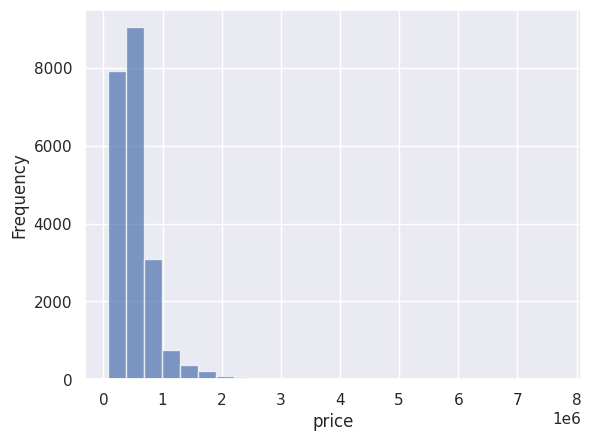

In [21]:
# Distribución de la variable objetivo
df['price'].plot.hist(alpha=0.7, bins=25, grid = True)
plt.xlabel('price')
plt.show()

Observamos que la mayor parte de las casas están entre precios bajo y medios. Según aumenta el precio, la frecuencia disminuye de manera pronunciada.

En siguiente lugar quitamos la variable identificador. Además también suprimimos las variables *date* y las relacionadas con la localización *zipcode*, *lat*, *long*, porque no serán relevantes para nuestro análisis.

In [8]:
df_cop = df_cop.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
df_cop.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


###**1.3. MATRIZ DE CORRELACIONES**

,price,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.585379,0.082447
bathrooms,0.525138,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.568634,0.087175
sqft_living,0.702035,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.756420,0.183286
sqft_lot,0.089661,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.144608,0.718557
floors,0.256794,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.279885,-0.011269
sqft_above,0.605567,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.731870,0.194050
sqft_basement,0.323816,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,0.200355,0.017276
sqft_living15,0.585379,0.568634,0.756420,0.144608,0.279885,0.731870,0.200355,1.000000,0.183192
sqft_lot15,0.082447,0.087175,0.183286,0.718557,-0.011269,0.194050,0.017276,0.183192,1.000000


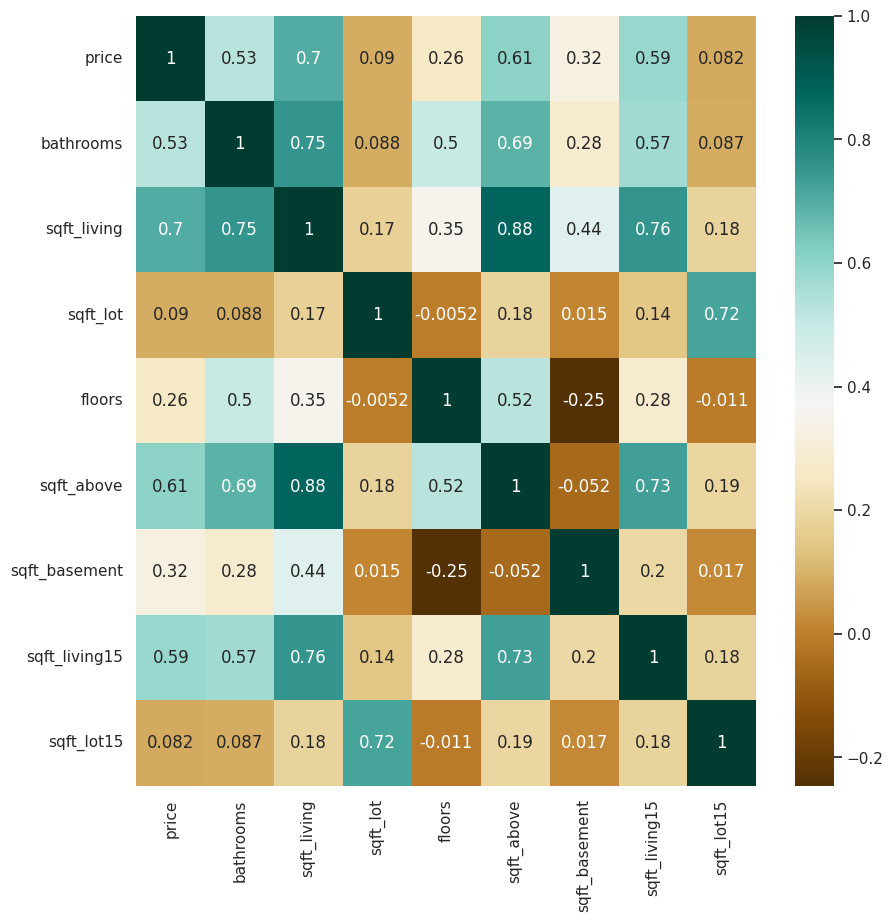

In [9]:
#Hacemos matriz de correlaciones de variables continuas
#batrooms y floors son continuas por la manera en la que se han codificado
plt.figure(figsize=(10,10))
df_cont=df_cop.drop(['bedrooms','waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'], axis=1)
corr_cont= df_cont.corr()

sns.heatmap(corr_cont,cmap="BrBG",annot=True)
corr_cont

Observamos que la variable *price*, está altamente correlacionada con *sqft_living*, *sqft_above*, *sqft_living15* y *bathrooms*, es decir con la superficie y los baños de la casa.
Las superficies tanto de la sala de estar, como la superficie por encima del nivel del suelo, están muy correlacionadas entre sí, así como con la superficie de estas mismas cosas, de los 15 vecinos más cercanos.
También, *bathrooms* está muy correlacionada con *floors* y *sqft_above*, lo que tiene mucho sentido pues suele haber 1 o 2 baños por planta, por tanto a más plantas, más baños.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


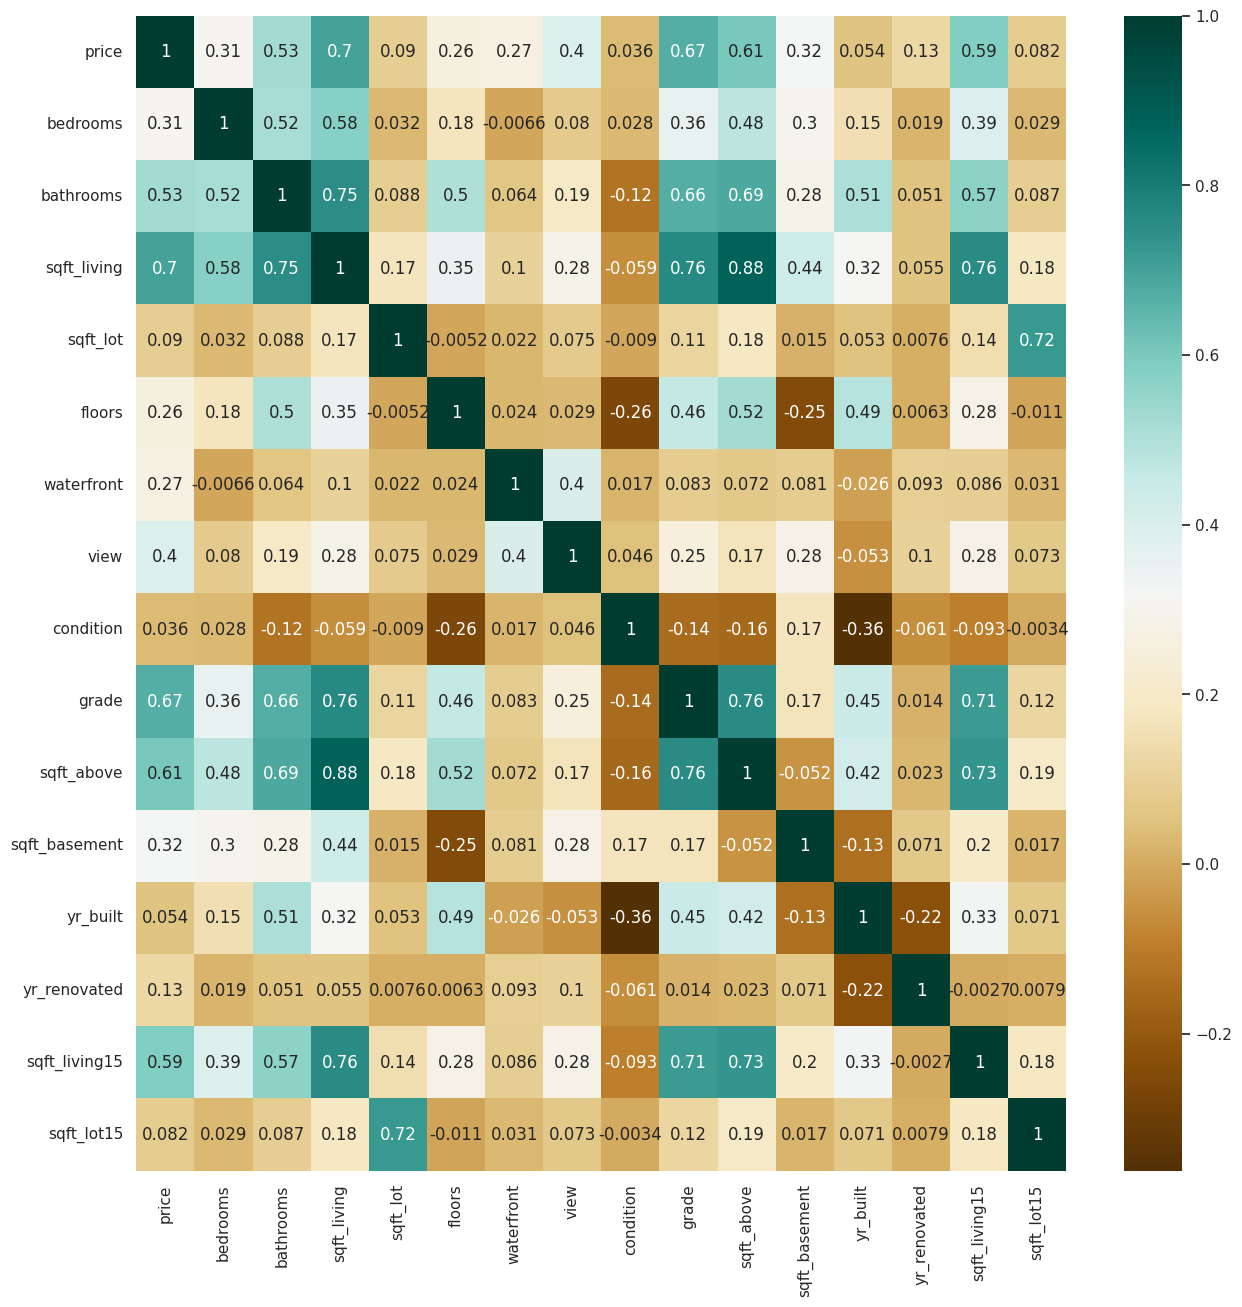

In [11]:
#Hacemos matriz de correlaciones con todas las variables
plt.figure(figsize=(15,15))
corr= df_cop.corr()

sns.heatmap(corr,cmap="BrBG",annot=True) 
corr

Vemos que *grade* tiene una alta correlación con *price*. Y por tanto presenta alta correlación con las variables superficie.
Observamos que bedrooms, también está altamente correlacionada con las variables superficie.
Además vemos que *condition* no está casi correlacionada con *price*, lo que es bastante raro. Además, *waterfront* e *yr_renovated* no están my correlacionadas con ninguna.



###2. VISUALIZACIÓN DE OUTLIERS









Veamos si puede haber presencia de outliers, ya que no presentamos valores missing

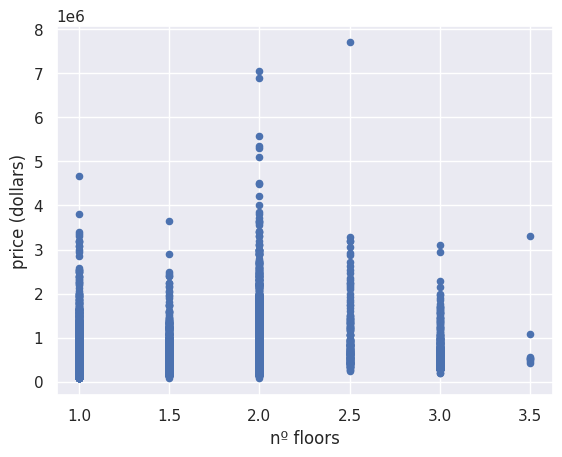

In [16]:
df_cop.plot(kind = 'scatter',x='floors',y = 'price')
plt.xlabel('nº floors')
plt.ylabel('price (dollars)')
plt.show()

Vemos que hay casas con precios muy altos, teniendo el mismo número de plantas que otras

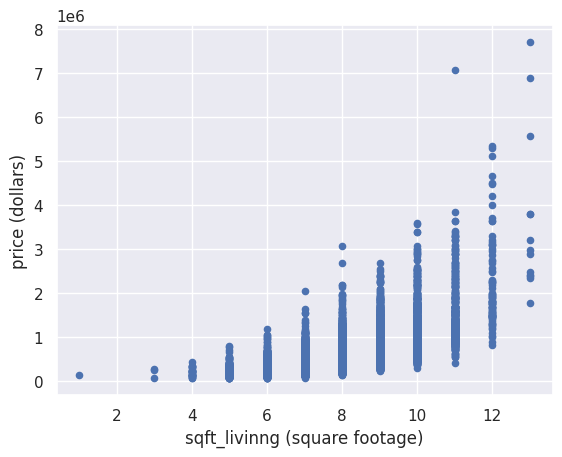

In [18]:
df_cop.plot(kind = 'scatter',x='grade',y = 'price')
plt.xlabel('grade (1-13)')
plt.ylabel('price (dollars)')
plt.show()

En este caso también vemos que hay altos precios para una calidad estándar, o precio bajos para una gran calidad.



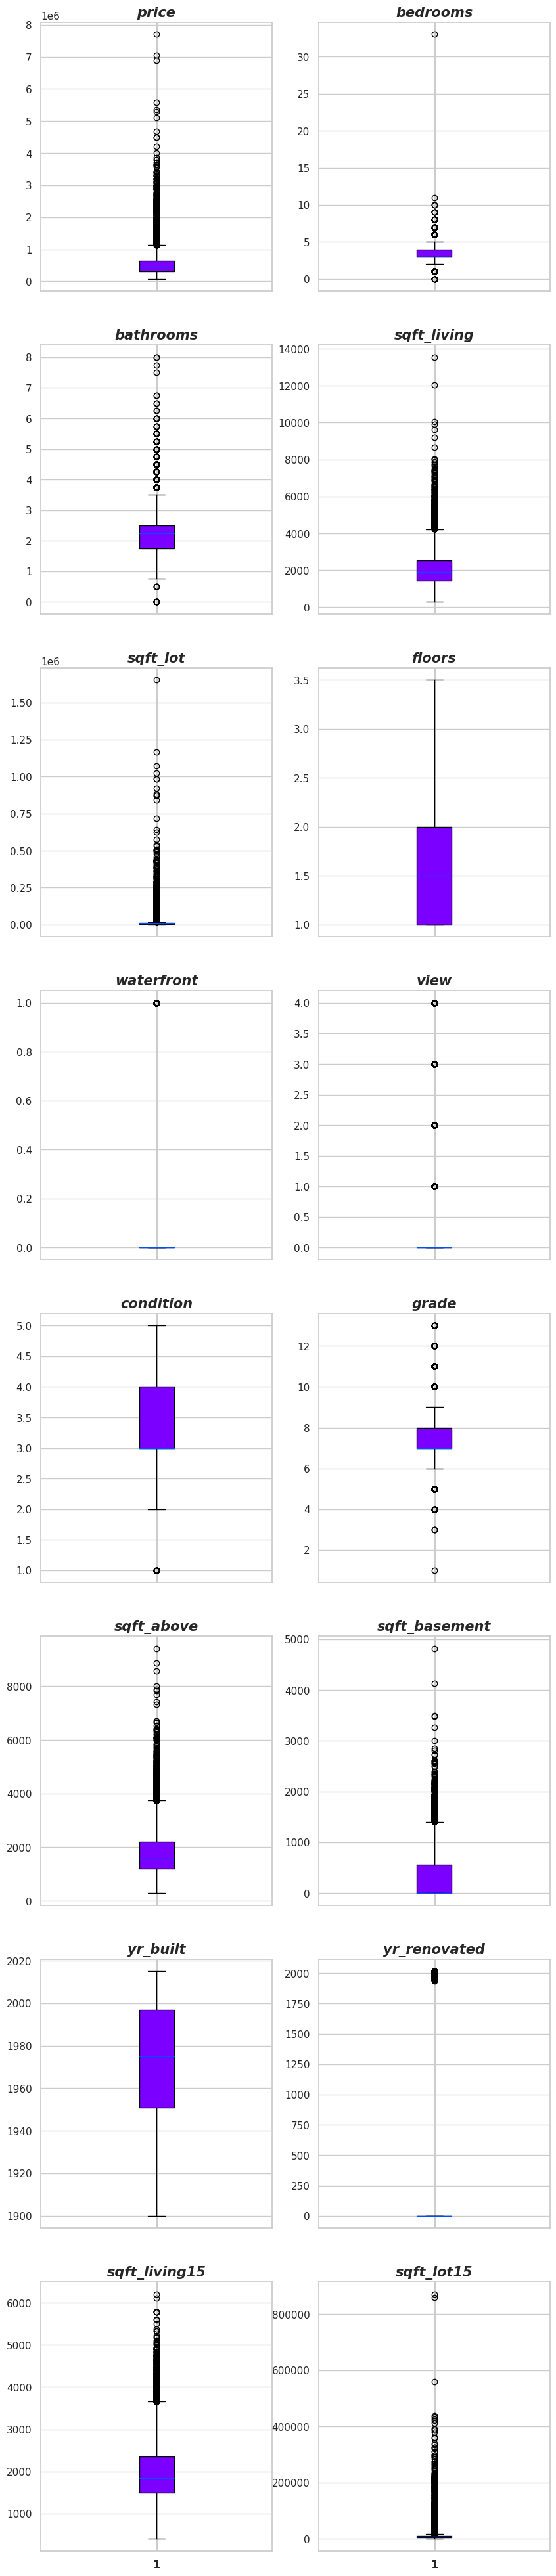

In [26]:
sns.set_theme(style='whitegrid', palette='gist_rainbow_r')
fig, axes = plt.subplots(nrows=8, ncols=2, sharex=True, figsize=(10, 50))
axes = np.reshape(axes, -1)

for j, i in enumerate(df_cop.columns):
    axes[j].boxplot(x=df_cop[i], patch_artist=True)
    axes[j].set_title(df_cop.columns[j], fontsize=15, fontweight='bold', style ='italic')

Vemos que hay muchos datos atípicos, pero igual quitarlos no sería lo mejor del mundo ya que puede que sea bueno en algunos casos saber estimar precios de casas con datos atípicos, como muchos baños o muchas habitaciones por encima de la media.

##3. TRANSFORMACIÓN DE VARIABLES

###**3.1. TRANSFORMACIÓN Y CREACIÓN DE VARIABLES**

Como vimos en la distribución de la variable objetivo, tenía una cola por la derecha, por tanto, normalizamos

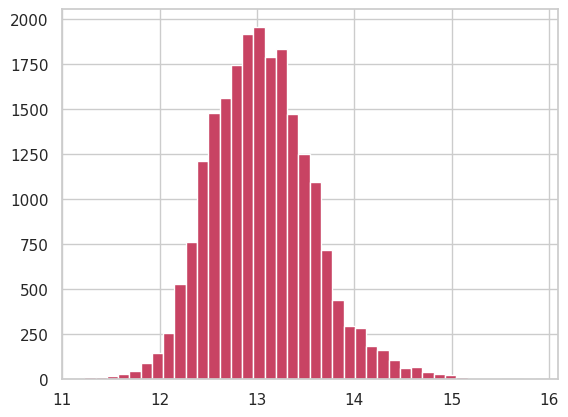

In [27]:
#Tomamos el log
df_cop['lprice'] = np.log(df_cop['price'])
plt.hist(x=df_cop['lprice'], bins=40, color='#C84363')
plt.show()

Veamos a ver las distribuciones de sqft_living y sqft_living15, y las de sqft_lot y sqft_lot15, pues ya en la matriz de correlaciones vimos que estban altamente correlacionadas

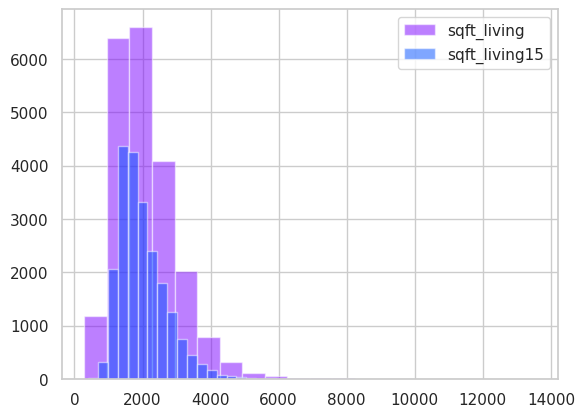

In [28]:
plt.hist(df_cop['sqft_living'], bins=20, alpha=0.5, label='sqft_living', histtype='bar')
plt.hist(df_cop['sqft_living15'], bins=20, alpha=0.5, label='sqft_living15', histtype='bar')
plt.legend(loc='upper right')
plt.show()

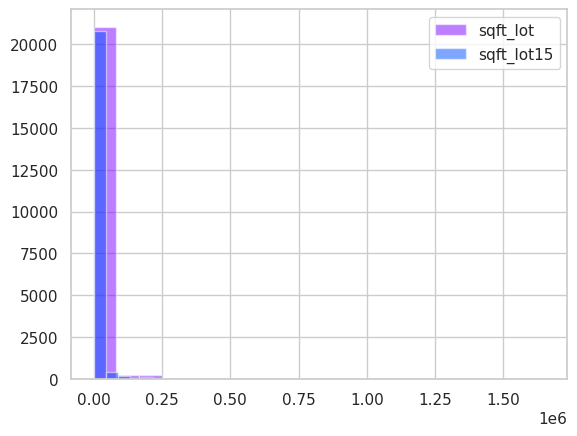

In [29]:
plt.hist(df_cop['sqft_lot'], bins=20, alpha=0.5, label='sqft_lot', histtype='bar')
plt.hist(df_cop['sqft_lot15'], bins=20, alpha=0.5, label='sqft_lot15', histtype='bar')
plt.legend(loc='upper right')
plt.show()

Vemos que tienen una distribución muy parecidas, así que prescindiremos de las variables *sqft_living15* y *sqft_lot15*, y aunque podríamos estudiar por ejemplo como el vecindario puede afectar al precio de la casa, las eliminamos para simplificar y nuestro objetivo estará en otro punto.

In [30]:
df_cop = df_cop.drop(['sqft_living15', 'sqft_lot15'], axis=1)
df_cop.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lprice
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,13.195614
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,13.142166


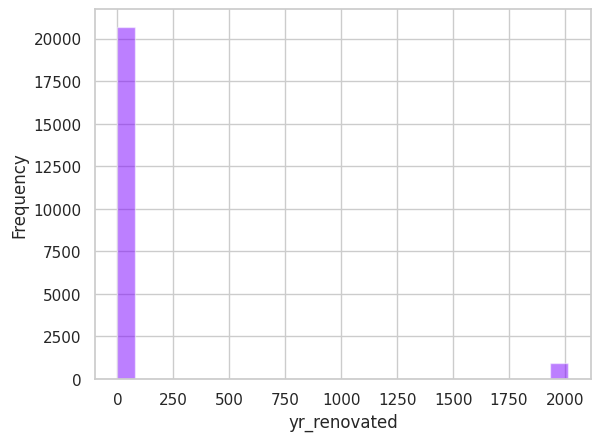

In [31]:
#Distribución de la variable yr_renovated
df['yr_renovated'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_renovated')
plt.show()

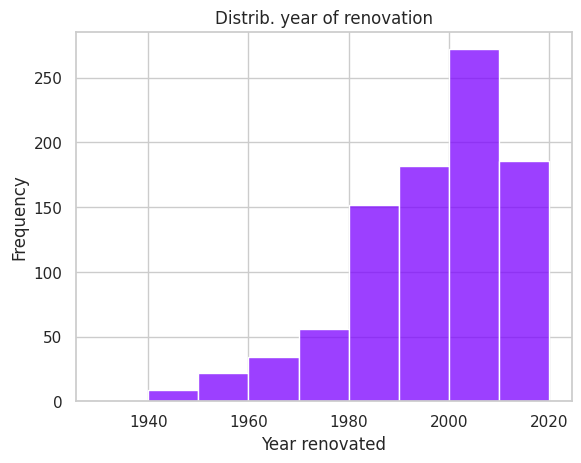

In [32]:
renovated = df[df['yr_renovated'] != 0]
sns.histplot(renovated['yr_renovated'], bins=(1930, 1940, 1950, 1960, 1970, 1980, 1990,2000, 2010, 2020))
plt.xlabel('Year renovated')
plt.ylabel('Frequency')
plt.title('Distrib. year of renovation')

plt.show()

En siguiente lugar, sabemos que yr_renovated tiene muchos ceros, y como esto puede causar problemas, hacemos la transformación que sigue

In [33]:
df_cop['yr_renovated_t'] = np.where(df_cop['yr_renovated'] != 0, df_cop['yr_renovated'], df_cop['yr_built'])
df_cop.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lprice,yr_renovated_t
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,12.309982,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,13.195614,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,12.100712,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,13.311329,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,13.142166,1987
